In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.neural_network import MLPClassifier

In [2]:
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.shape

(768, 9)

In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


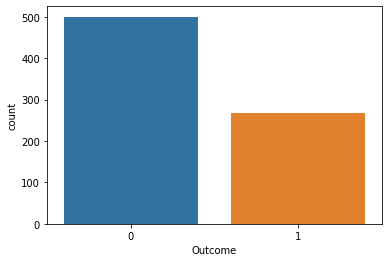

In [8]:
sns.countplot(x=df['Outcome'])

In [9]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [10]:
df['Outcome'].unique()

array([1, 0])

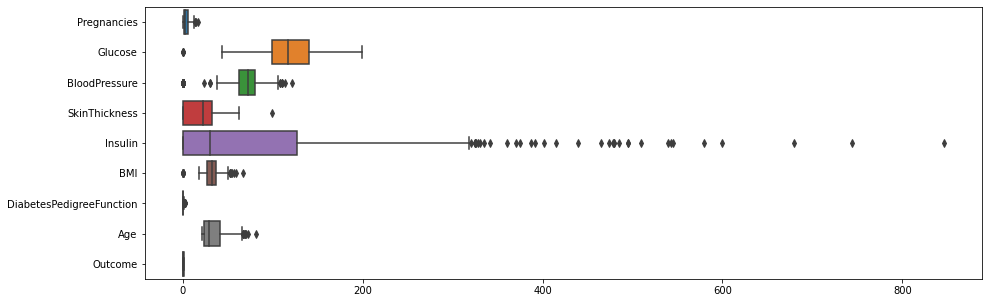

In [11]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df,orient='h')
plt.show()

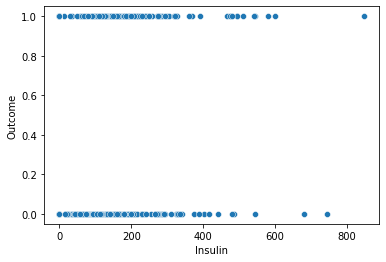

In [12]:
sns.scatterplot(x = df['Insulin'], y = df['Outcome'])
plt.show()

In [13]:
X = df.drop('Outcome',axis=1)
Y = df['Outcome']

In [14]:
X.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [15]:
X.replace(to_replace=0 , value=X.mean(),inplace=True)

In [16]:
X.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.400782,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885
std,2.984162,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,2.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000
50%,3.845052,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


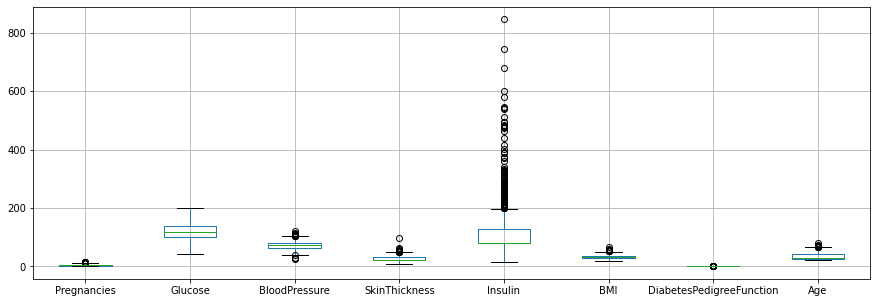

In [17]:
X.boxplot(figsize=(15,5))
plt.show()

In [18]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.2,random_state=101)
X_train.shape , X_test.shape , Y_train.shape , Y_test.shape

((614, 8), (154, 8), (614,), (154,))

In [19]:
Y_train.value_counts()

0    397
1    217
Name: Outcome, dtype: int64

In [20]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
X_train_std

array([[-0.81089478, -0.94320345, -0.67501765, ...,  0.77641365,
         0.62083528, -0.86196915],
       [-0.12231061,  2.06645544,  0.47764539, ...,  0.63250137,
        -0.64915711, -0.19012014],
       [-0.81089478,  0.11513814, -1.00434995, ...,  0.17198206,
        -1.19432458, -0.19012014],
       ...,
       [-1.15518687, -0.08330091, -2.32167913, ...,  0.41663294,
        -0.59959643, -0.6940069 ],
       [ 0.22198148, -0.21559361,  0.31297924, ..., -0.20218987,
        -0.40445126,  0.9016345 ],
       [ 1.59914984,  0.28050401, -0.1810192 , ...,  0.22954698,
         0.55268935,  0.98561563]])

In [21]:
X_test_std

array([[-1.15518687,  0.14821131, -1.00434995, ..., -0.36049338,
        -0.38586601,  1.15357788],
       [-0.46660269,  2.16567496, -0.1810192 , ...,  0.546154  ,
        -0.203111  ,  0.22978549],
       [ 0.91056566, -0.51325218,  1.63030843, ..., -1.42544428,
        -0.73898584,  1.23755901],
       ...,
       [ 0.56627357,  0.41279671, -0.1810192 , ...,  0.40224172,
         0.21195968, -0.35808239],
       [ 1.94344193, -1.77003282,  2.78297147, ...,  0.41663294,
        -0.58410872,  1.15357788],
       [ 3.32061028, -0.71169123,  0.47764539, ...,  0.57493645,
        -0.19072083,  1.06959676]])

In [22]:
svc = SVC()
svc.fit(X_train_std,Y_train)

SVC()

In [23]:
pred = svc.predict(X_test_std)
pred

array([0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1])

In [24]:
print(f"Accuracy = {accuracy_score(Y_test,pred)*100}")
print(f"Confusion Matrix =\n {confusion_matrix(Y_test,pred)}")
print(f"Classification Report =\n {classification_report(Y_test,pred)}")

Accuracy = 80.51948051948052
Confusion Matrix =
 [[91 12]
 [18 33]]
Classification Report =
               precision    recall  f1-score   support

           0       0.83      0.88      0.86       103
           1       0.73      0.65      0.69        51

    accuracy                           0.81       154
   macro avg       0.78      0.77      0.77       154
weighted avg       0.80      0.81      0.80       154



In [25]:
pd.DataFrame(np.c_[Y_test,pred],columns=['Actual','Predicted'])

,Actual,Predicted
0,1,0
1,1,1
2,0,0
3,1,0
4,0,0
...,...,...
149,1,1
150,1,0
151,1,1
152,0,0


In [26]:
mlp = MLPClassifier(hidden_layer_sizes=(8,8))
mlp.fit(X_train_std,Y_train)

MLPClassifier(hidden_layer_sizes=(8, 8))

In [27]:
pred1 = mlp.predict(X_test_std)
pred1

array([0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1])

In [28]:
print(f"Accuracy = {accuracy_score(Y_test,pred1)*100}")
print(f"Confusion Matrix =\n {confusion_matrix(Y_test,pred1)}")
print(f"Classification Report =\n {classification_report(Y_test,pred1)}")

Accuracy = 80.51948051948052
Confusion Matrix =
 [[89 14]
 [16 35]]
Classification Report =
               precision    recall  f1-score   support

           0       0.85      0.86      0.86       103
           1       0.71      0.69      0.70        51

    accuracy                           0.81       154
   macro avg       0.78      0.78      0.78       154
weighted avg       0.80      0.81      0.80       154



In [29]:
pd.DataFrame(np.c_[Y_test,pred1],columns=['Actual','Predicted'])

,Actual,Predicted
0,1,0
1,1,1
2,0,0
3,1,1
4,0,0
...,...,...
149,1,1
150,1,0
151,1,1
152,0,0


# Machine Learning Algorithm is clearly winner with a better accuracy